## 00 packages

In [2]:
##########################################################################################
##########################################################################################

import networkx as nx

from shapely.geometry import Point,Polygon

import math

import random

##########################################################################################
##########################################################################################

import numpy as np

import pandas as pd

##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

from itertools import combinations, permutations

from itertools import islice

##########################################################################################
##########################################################################################

import copy


### 01 parameters

In [3]:
##########################################################################################
##########################################################################################

alpha=1

batch_interval=1

##########################################################################################
##########################################################################################

length=1e3


##########################################################################################
##########################################################################################

instance='01'

speed=10000/60

Lockers=np.load("./01network/"+instance+"/Lockers.npy")

Lockers=tuple([(x[0],x[1]) for x in Lockers])

Hexagon_Vertices=np.load("./01network/"+instance+"/Hexagon_Vertices.npy",allow_pickle=True).item()

Hexagons=np.load("./01network/"+instance+"/Hexagons.npy")

Hexagon_Center=np.load("./01network/"+instance+"/Hexagon_Center.npy",allow_pickle=True).item()



### 01 Comparision of the latest compeletion time

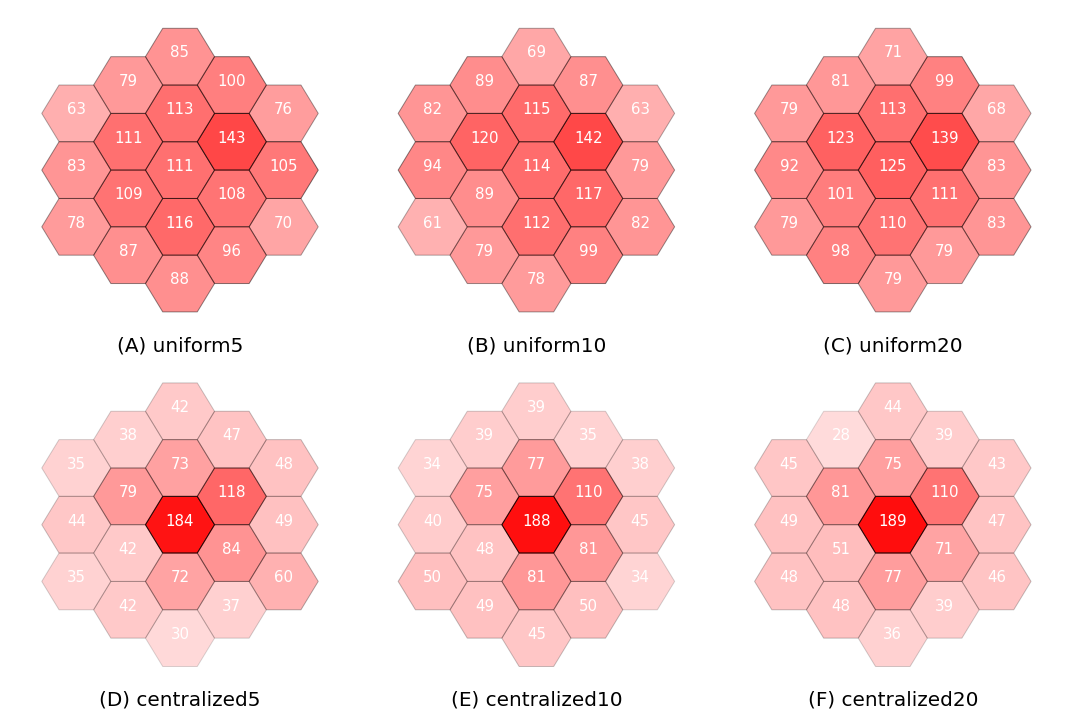

In [4]:
##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################

def calculate_distance(schedule):

    tt_dis=0

    trajectory=list(schedule.values())

    for i in range(1, len(trajectory),1):

        tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))

    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 25}

figure, axs = plt.subplots(2,3,figsize=(15,10))

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

##########################################################################################
##########################################################################################

figure_jdx=0

label_idx=0


##########################################################################################
##########################################################################################


colors=['blue','red','green']


##########################################################################################
##########################################################################################

widths=[-0.25,0,0.25]

for pattern in patterns:
    
    figure_idx=0

    for lambda_value in lambda_values:

        ##########################################################################################
        ##########################################################################################

        instance_name=pattern+str(lambda_value)

        ##########################################################################################
        ##########################################################################################

        for i in range(len(save_paths)):

            ##########################################################################################
            ##########################################################################################

            Courier_occupancy={}

            ##########################################################################################
            ##########################################################################################

            save_path=save_paths[i]

            save_path=save_path+pattern+'_'+str(lambda_value)

            ##########################################################################################
            ##########################################################################################

            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
            
            ##########################################################################################
            ##########################################################################################
            
            courier_df=pd.read_csv('./02data/'+instance+'/courier_instance.csv')

            courier_df=courier_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            Courier_tasks={}

            for idx,row in courier_df.iterrows():

                Courier_tasks[row.courier_id]=0
                
            ##########################################################################################
            ##########################################################################################
                
            Courier_hexagon={}

            for idx,row in courier_df.iterrows():

                Courier_hexagon[row.courier_id]=row.hexagon
                
            ##########################################################################################
            ##########################################################################################
                
            Hexagon_courier={}

            for idx,row in courier_df.iterrows():

                if row.hexagon not in Hexagon_courier.keys():

                    Hexagon_courier[row.hexagon]=[row.courier_id]

                else:

                    Hexagon_courier[row.hexagon].append(row.courier_id)

            ##########################################################################################
            ##########################################################################################

            for parcel_id,parcel_schedule in parcel_schedules.items():
                
                couriers=list(parcel_schedule.keys())
                
                for courier_id in couriers:
                    
                    Courier_tasks[courier_id]+=1
                    
            ##########################################################################################
            ##########################################################################################
            
            Hexagon_courier_tasks={}

            for hexagon,couriers in Hexagon_courier.items():

                Hexagon_courier_tasks[hexagon]=list()

                for courier in couriers:

                    Hexagon_courier_tasks[hexagon].append(Courier_tasks[courier])
                    
            ##########################################################################################
            ##########################################################################################
            
            Hexagon_courier_avg_tasks={}

            for hexagon,task in Hexagon_courier_tasks.items():

                Hexagon_courier_avg_tasks[hexagon]=np.array(task).mean()
                
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_jdx][figure_idx].set_xlim([-5000,5000])

            axs[figure_jdx][figure_idx].set_ylim([-5000,5000])

            for hexagon in Hexagons:

                vertice=Hexagon_Vertices[hexagon]

                hexagon = matplotlib.patches.Polygon(vertice, closed=True, edgecolor='black', facecolor='red',alpha=Hexagon_courier_avg_tasks[hexagon]/200.0)

                axs[figure_jdx][figure_idx].add_patch(hexagon)


            for hexagon_id, center in Hexagon_Center.items():

                axs[figure_jdx][figure_idx].text(center[0], center[1], str(int(Hexagon_courier_avg_tasks[hexagon_id])), fontsize=15, color='white',ha='center')

            # Hide the x and y axes

            axs[figure_jdx][figure_idx].axis('off')
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_jdx][figure_idx].text(0.5, -0.05, labels[label_idx]+' '+instance_name, ha='center', transform=axs[figure_jdx][figure_idx].transAxes,fontsize=20, fontstyle='normal')



        
        figure_idx+=1
        
        label_idx+=1
    
    figure_jdx+=1
        


##########################################################################################
##########################################################################################

plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/10Heatmap_tasks.png',dpi=1000, bbox_inches = 'tight')

plt.show()

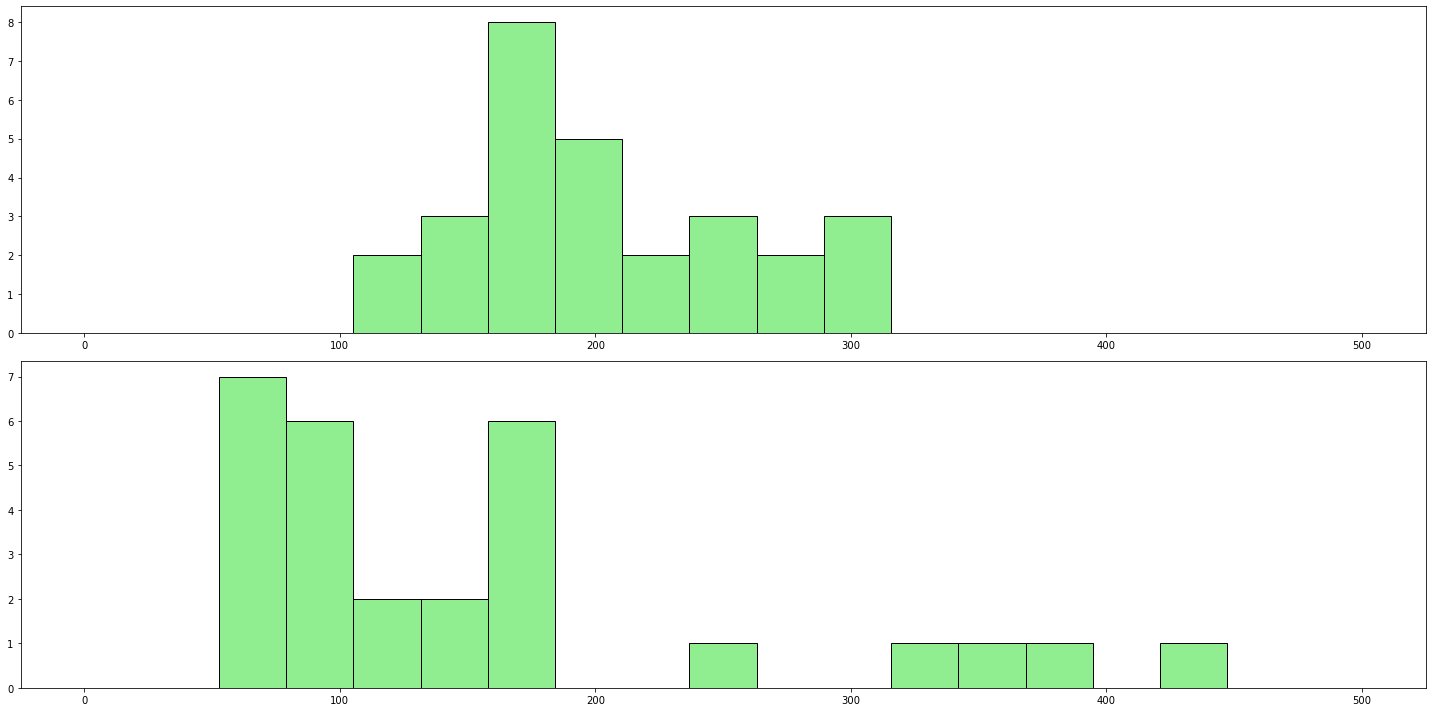

In [12]:
##########################################################################################
##########################################################################################

lambda_values = [10]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################

def calculate_distance(schedule):

    tt_dis=0

    trajectory=list(schedule.values())

    for i in range(1, len(trajectory),1):

        tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))

    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 25}

figure, axs = plt.subplots(2,1,figsize=(20,10))

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

##########################################################################################
##########################################################################################

figure_jdx=0

label_idx=0


##########################################################################################
##########################################################################################


colors=['blue','red','green']


##########################################################################################
##########################################################################################

widths=[-0.25,0,0.25]

for pattern in patterns:

    for lambda_value in lambda_values:

        ##########################################################################################
        ##########################################################################################

        instance_name=pattern+str(lambda_value)

        ##########################################################################################
        ##########################################################################################

        for i in range(len(save_paths)):

            ##########################################################################################
            ##########################################################################################

            Courier_occupancy={}

            ##########################################################################################
            ##########################################################################################

            save_path=save_paths[i]

            save_path=save_path+pattern+'_'+str(lambda_value)

            ##########################################################################################
            ##########################################################################################

            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
            
            ##########################################################################################
            ##########################################################################################
            
            courier_df=pd.read_csv('./02data/'+instance+'/courier_instance.csv')

            courier_df=courier_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            Courier_tasks={}

            for idx,row in courier_df.iterrows():

                Courier_tasks[row.courier_id]=0
                
            ##########################################################################################
            ##########################################################################################

            for parcel_id,parcel_schedule in parcel_schedules.items():
                
                couriers=list(parcel_schedule.keys())
                
                for courier_id in couriers:
                    
                    Courier_tasks[courier_id]+=1
                    
            Courier_revenue=[x*2 for x in list(Courier_tasks.values())]
                    
            ##########################################################################################
            ##########################################################################################
            
            binBoundaries = np.linspace(0,500,20)
            
            axs[figure_jdx].hist(Courier_revenue,bins=binBoundaries, edgecolor='black',facecolor='lightgreen')
            
    figure_jdx+=1
            


##########################################################################################
##########################################################################################

plt.tight_layout()

current_fig = plt.gcf() 

# current_fig.savefig('./07figures/10Heatmap_tasks.png',dpi=1000, bbox_inches = 'tight')

plt.show()